<a href="https://colab.research.google.com/github/Mrunal280416/Customer-survey/blob/main/Copy_of_Muktha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


📌 Find-S Hypothesis: ['?', '?', '?', np.float64(1.0)]
📌 Candidate Elimination:
S (Specific): [['?', '?', '?', '?']]
G (General): []

✅ KNN (Best Params {'n_neighbors': 7}) Accuracy: 61.44%
✅ Decision Tree (Best Params {'criterion': 'gini', 'max_depth': 3}) Accuracy: 67.09%
✅ Random Forest (Best Params {'max_depth': 3, 'n_estimators': 50}) Accuracy: 67.09%
✅ SVM (Best Params {'C': 0.1, 'kernel': 'linear'}) Accuracy: 67.09%

📈 Single Linear Regression R²: 0.00, MSE: 0.2878
📈 Multiple Linear Regression R²: 0.00, MSE: 0.2877


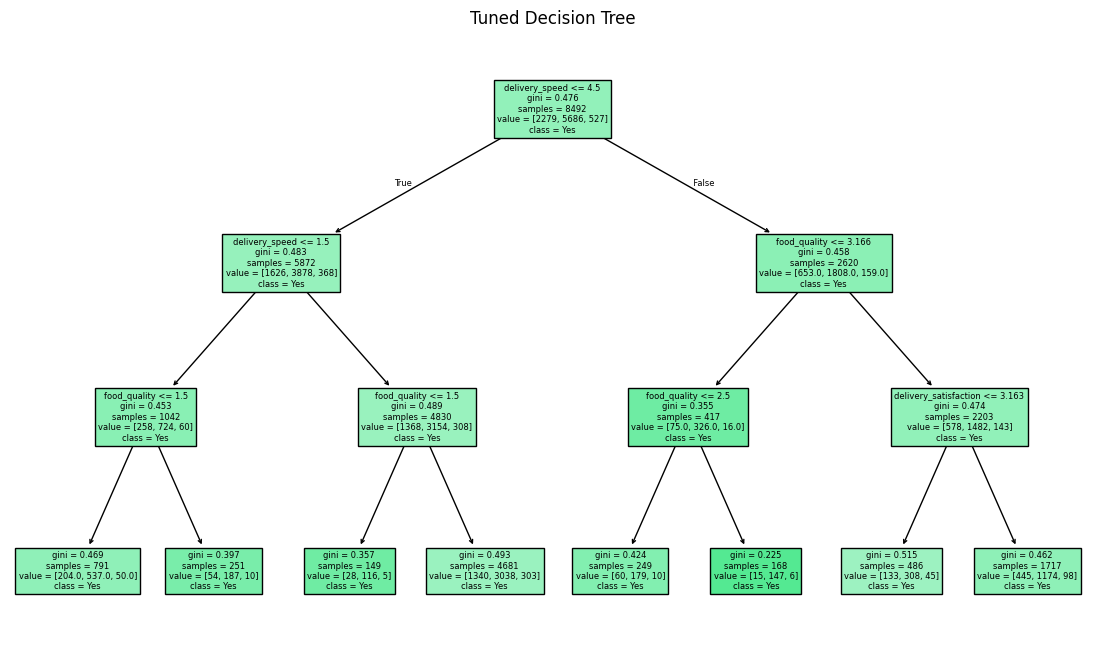

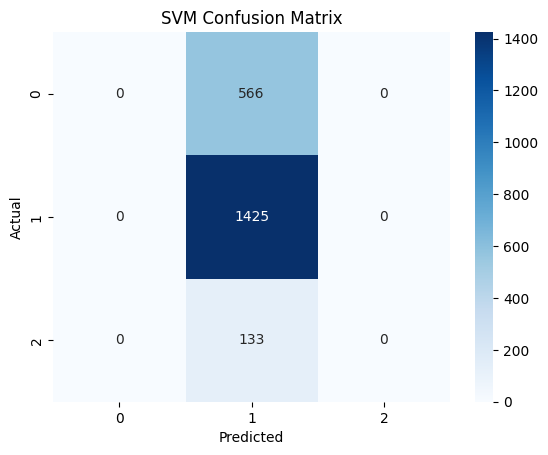

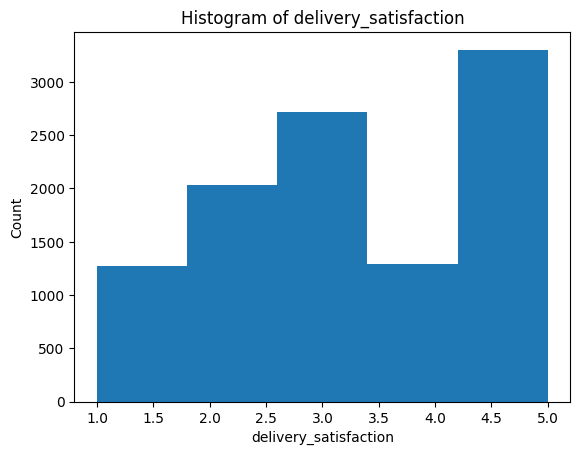

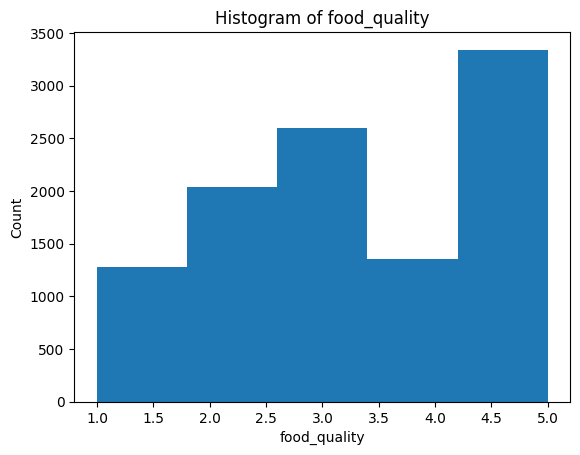

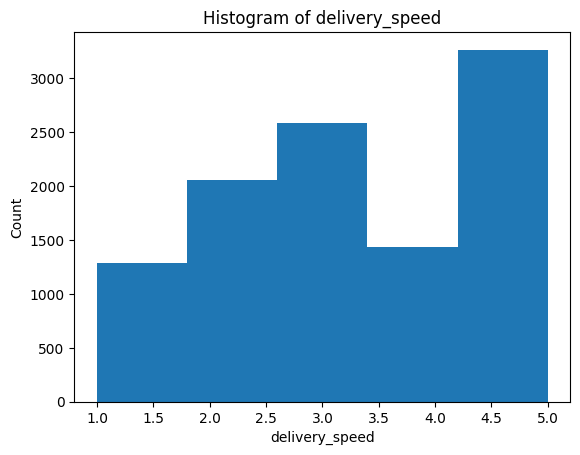

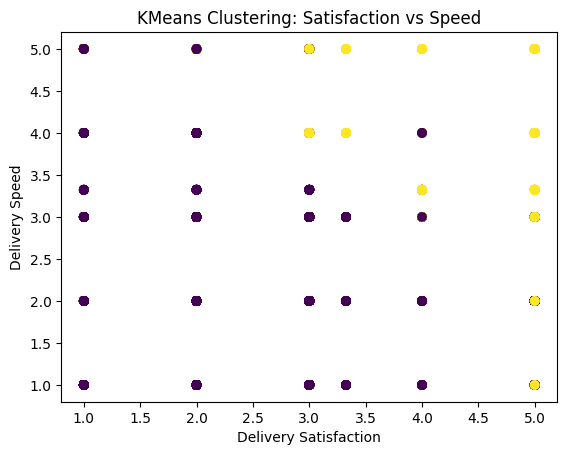

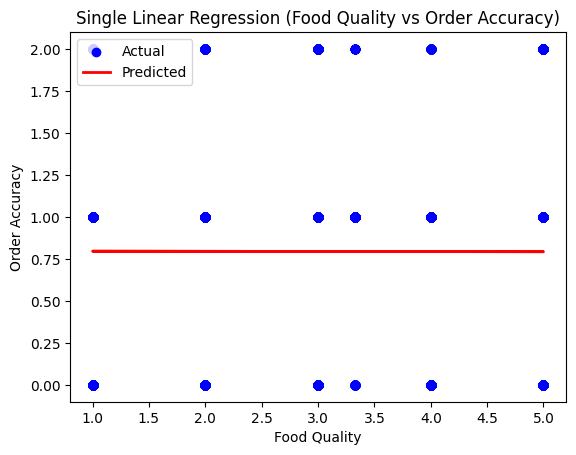

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 📄 Load and Clean Dataset
file_path = "/content/archive (2).zip"
df = pd.read_csv(file_path)
df.columns = ['customer', 'delivery_satisfaction', 'food_quality', 'delivery_speed', 'order_accuracy']
df = df.drop('customer', axis=1)

# 🔄 Encode
le = LabelEncoder()
df['order_accuracy'] = le.fit_transform(df['order_accuracy'].astype(str))
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# 🔎 Find-S Algorithm
def find_s(data):
    concepts = data.iloc[:, :-1].values
    target = data.iloc[:, -1].values
    hypothesis = ['0'] * len(concepts[0])
    for i, val in enumerate(target):
        if val == 1:
            if hypothesis == ['0'] * len(hypothesis):
                hypothesis = list(concepts[i])
            else:
                for j in range(len(hypothesis)):
                    if hypothesis[j] != concepts[i][j]:
                        hypothesis[j] = '?'
    return hypothesis

# 🔎 Candidate Elimination
def candidate_elimination(data):
    concepts = data.iloc[:, :-1].values
    target = data.iloc[:, -1].values
    n_features = concepts.shape[1]
    G = [['?' for _ in range(n_features)]]
    S = [['0' for _ in range(n_features)]]
    for i, val in enumerate(target):
        instance = concepts[i]
        if val == 1:
            for j in range(n_features):
                if S[0][j] == '0':
                    S[0][j] = instance[j]
                elif S[0][j] != instance[j]:
                    S[0][j] = '?'
            G = [g for g in G if all(g[j] == '?' or g[j] == S[0][j] for j in range(n_features))]
        else:
            G_new = []
            for g in G:
                for j in range(n_features):
                    if g[j] == '?':
                        for val in np.unique(concepts[:, j]):
                            if val != instance[j]:
                                new_hypo = g.copy()
                                new_hypo[j] = val
                                if all(new_hypo[k] == '?' or new_hypo[k] == S[0][k] for k in range(n_features)):
                                    G_new.append(new_hypo)
            G = G_new
    return S, G

# 📈 Split
X = df.drop('order_accuracy', axis=1)
y = df['order_accuracy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔧 KNN Tuning
knn_params = {'n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)
knn_pred = knn_grid.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

# 🔧 Decision Tree Tuning
dt_params = {'max_depth': [3, 5, 7, None], 'criterion': ['gini', 'entropy']}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
dt_pred = dt_grid.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# 🔧 Random Forest Tuning
rf_params = {'n_estimators': [50, 100], 'max_depth': [3, 5, None]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
rf_pred = rf_grid.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# 🔧 SVM Tuning
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5)
svm_grid.fit(X_train, y_train)
svm_pred = svm_grid.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

# 📊 K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
df['kmeans_cluster'] = kmeans.labels_

# 📈 Linear Regressions
# Single
X_single = df[['food_quality']]
y_single = df['order_accuracy']
lr_single = LinearRegression()
lr_single.fit(X_single, y_single)
y_single_pred = lr_single.predict(X_single)
single_mse = mean_squared_error(y_single, y_single_pred)
single_r2 = r2_score(y_single, y_single_pred)

# Multiple
X_multi = df.drop(['order_accuracy', 'kmeans_cluster'], axis=1)
y_multi = df['order_accuracy']
lr_multi = LinearRegression()
lr_multi.fit(X_multi, y_multi)
y_multi_pred = lr_multi.predict(X_multi)
multi_mse = mean_squared_error(y_multi, y_multi_pred)
multi_r2 = r2_score(y_multi, y_multi_pred)

# 📌 Symbolic Learners
fs_result = find_s(df[df['order_accuracy'] == 1])
s_final, g_final = candidate_elimination(df)

# 📊 Output
print("\n📌 Find-S Hypothesis:", fs_result)
print("📌 Candidate Elimination:")
print("S (Specific):", s_final)
print("G (General):", g_final)
print(f"\n✅ KNN (Best Params {knn_grid.best_params_}) Accuracy: {knn_acc*100:.2f}%")
print(f"✅ Decision Tree (Best Params {dt_grid.best_params_}) Accuracy: {dt_acc*100:.2f}%")
print(f"✅ Random Forest (Best Params {rf_grid.best_params_}) Accuracy: {rf_acc*100:.2f}%")
print(f"✅ SVM (Best Params {svm_grid.best_params_}) Accuracy: {svm_acc*100:.2f}%")
print(f"\n📈 Single Linear Regression R²: {single_r2:.2f}, MSE: {single_mse:.4f}")
print(f"📈 Multiple Linear Regression R²: {multi_r2:.2f}, MSE: {multi_mse:.4f}")

# 📊 Plots
plt.figure(figsize=(14, 8))
plot_tree(dt_grid.best_estimator_, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Tuned Decision Tree")
plt.show()

cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

for col in X.columns:
    plt.hist(X[col], bins=5)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

plt.scatter(df['delivery_satisfaction'], df['delivery_speed'], c=df['kmeans_cluster'], cmap='viridis')
plt.title("KMeans Clustering: Satisfaction vs Speed")
plt.xlabel("Delivery Satisfaction")
plt.ylabel("Delivery Speed")
plt.show()

plt.scatter(X_single, y_single, color='blue', label='Actual')
plt.plot(X_single, y_single_pred, color='red', linewidth=2, label='Predicted')
plt.title("Single Linear Regression (Food Quality vs Order Accuracy)")
plt.xlabel("Food Quality")
plt.ylabel("Order Accuracy")
plt.legend()
plt.show()